## DFO Si Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
import cmocean

mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rc('legend', fontsize=12)
mpl.rc('axes', titlesize=12)
mpl.rc('axes', labelsize=12)
mpl.rc('figure', titlesize=12)
mpl.rc('font', size=12)
mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble = ','.join(r'''
 \usepackage{txfonts}
 \usepackage{lmodern}
 '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][:,:,:,:]
    gdept=mesh.variables['gdept_1d'][0,:]
with nc.Dataset('/results/SalishSea/hindcast.201812/01jan16/SalishSea_1h_20160101_20160101_ptrc_T.nc') as ftemp:
        bounds=np.copy(ftemp.variables['deptht_bounds'][:,:])

In [3]:
df=et.loadDFO()
df.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,12.0,NaN,None,5.28,mg/m^3,6.6,13.6,umol/L,NaN,NaN,12.0,1982-07-16 01:21:00
1,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,21.5,NaN,None,0.61,mg/m^3,21.2,45.0,umol/L,NaN,NaN,21.5,1982-07-16 01:21:00
2,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,30.5,NaN,None,NaN,mg/m^3,23.5,47.4,umol/L,NaN,NaN,30.5,1982-07-16 01:21:00
3,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,52.3,NaN,None,NaN,mg/m^3,28.0,50.2,umol/L,NaN,NaN,52.3,1982-07-16 01:21:00
4,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,75.4,NaN,None,NaN,mg/m^3,26.5,49.1,umol/L,NaN,NaN,75.4,1982-07-16 01:21:00


(750, 0)

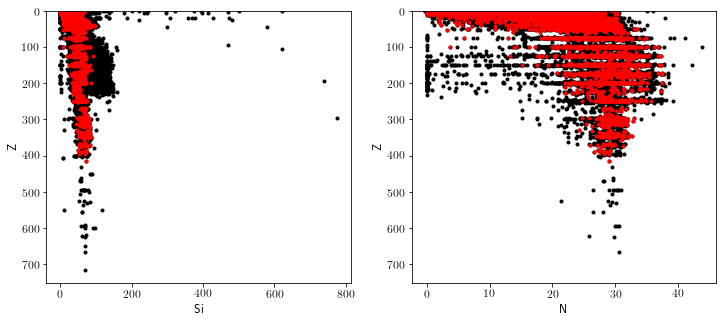

In [4]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(df['Si'],df['Z'],'k.')
ax[0].set_xlabel('Si')
ax[0].set_ylabel('Z')
ii=(df.Year>=2014)
ax[0].plot(df.loc[ii,['Si']],df.loc[ii,['Z']],'r.')
ax[0].set_ylim((750,0))

ax[1].plot(df['N'],df['Z'],'k.')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Z')
ii=(df.Year>=2014)
ax[1].plot(df.loc[ii,['N']],df.loc[ii,['Z']],'r.')
ax[1].set_ylim((750,0))

(0, 10)

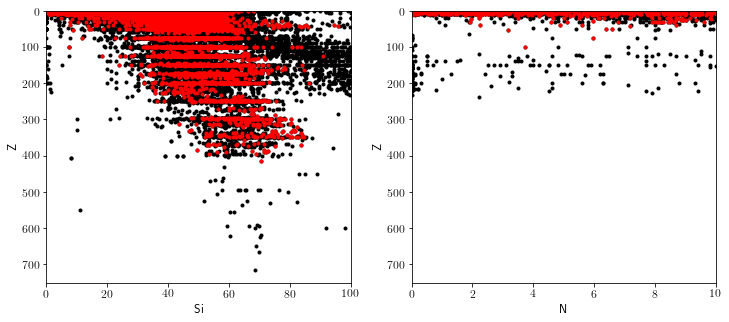

In [5]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(df['Si'],df['Z'],'k.')
ax[0].set_xlabel('Si')
ax[0].set_ylabel('Z')
ii=(df.Year>=2014)
ax[0].plot(df.loc[ii,['Si']],df.loc[ii,['Z']],'r.')
ax[0].set_ylim((750,0))
ax[0].set_xlim((0,100))

ax[1].plot(df['N'],df['Z'],'k.')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Z')
ii=(df.Year>=2014)
ax[1].plot(df.loc[ii,['N']],df.loc[ii,['Z']],'r.')
ax[1].set_ylim((750,0))
ax[1].set_xlim((0,10))

(0, 10)

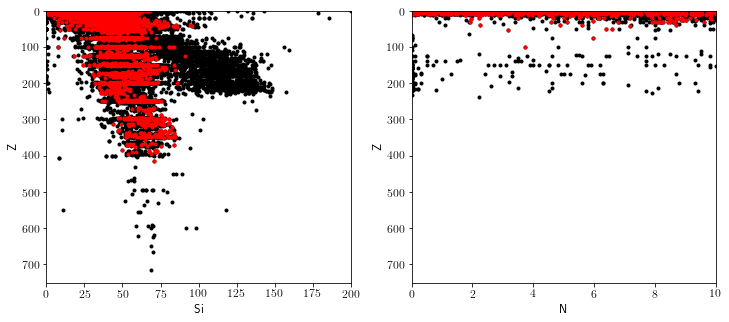

In [6]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(df['Si'],df['Z'],'k.')
ax[0].set_xlabel('Si')
ax[0].set_ylabel('Z')
ii=(df.Year>=2014)
ax[0].plot(df.loc[ii,['Si']],df.loc[ii,['Z']],'r.')
ax[0].set_ylim((750,0))
ax[0].set_xlim((0,200))

ax[1].plot(df['N'],df['Z'],'k.')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Z')
ii=(df.Year>=2014)
ax[1].plot(df.loc[ii,['N']],df.loc[ii,['Z']],'r.')
ax[1].set_ylim((750,0))
ax[1].set_xlim((0,10))

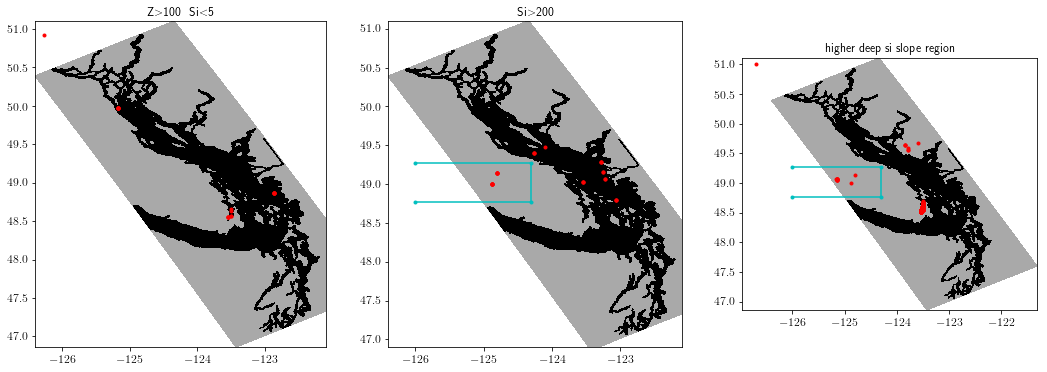

In [27]:
fig,ax=plt.subplots(1,3,figsize=(18,6))
iax=ax[0]
iax.contourf(navlon,navlat,tmask[0,0,:,:],levels=(0,.5,1.5),lw=.5,colors=('darkgray','k','k'))
iax.set_xlim(-126.4,-122.1)
viz_tools.set_aspect(iax,coords='map')
ii=(df['Z']>100)&(df['Si']<5)
iax.plot(df.loc[ii,['Lon']],df.loc[ii,['Lat']],'r.')
iax.set_title('Z$>$100 & Si$<$5')

iax=ax[1]
iax.contourf(navlon,navlat,tmask[0,0,:,:],levels=(0,.5,1.5),lw=.5,colors=('darkgray','k','k'))
iax.set_xlim(-126.4,-122.1)
iax.set_ylim(46.9,51.1)
viz_tools.set_aspect(iax,coords='map')
ii=(df['Si']>200)
iax.plot(df.loc[ii,['Lon']],df.loc[ii,['Lat']],'r.')
iax.set_title('Si$>$200')
iax.plot((-126,-124.3,-124.3,-126),(48.77,48.77,49.27,49.27),'c.-')

iax=ax[2]
iax.contourf(navlon,navlat,tmask[0,0,:,:],levels=(0,.5,1.5),lw=.5,colors=('darkgray','k','k'))
#iax.set_xlim(-126.4,-122.1)
#iax.set_ylim(46.9,51.1)
viz_tools.set_aspect(iax,coords='map')
ii=(df['Z']<220)&(df['Z']>100)&(df['Si']>100)
iax.plot(df.loc[ii,['Lon']],df.loc[ii,['Lat']],'r.')
iax.set_title('higher deep si slope region')
iax.plot((-126,-124.3,-124.3,-126),(48.77,48.77,49.27,49.27),'c.-')

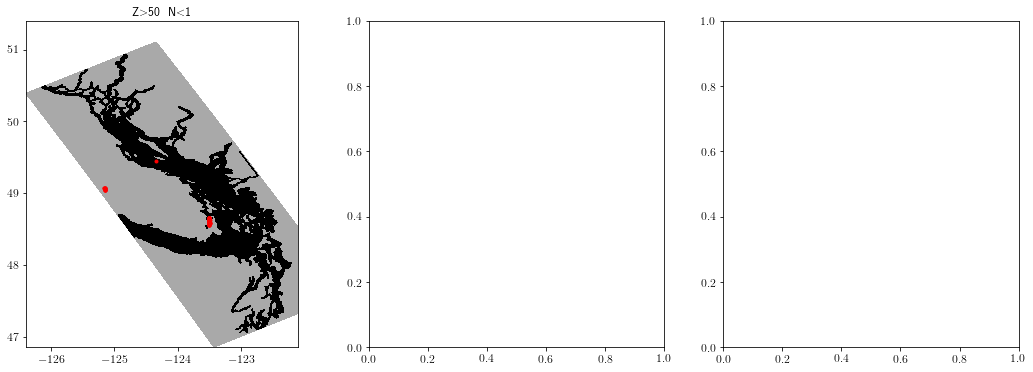

In [8]:
fig,ax=plt.subplots(1,3,figsize=(18,6))
iax=ax[0]
iax.contourf(navlon,navlat,tmask[0,0,:,:],levels=(0,.5,1.5),lw=.5,colors=('darkgray','k','k'))
iax.set_xlim(-126.4,-122.1)
viz_tools.set_aspect(iax,coords='map')
ii=(df['Z']>50)&(df['N']<1)
iax.plot(df.loc[ii,['Lon']],df.loc[ii,['Lat']],'r.')
iax.set_title('Z$>$50 & N$<$1')



(48.4, 49)

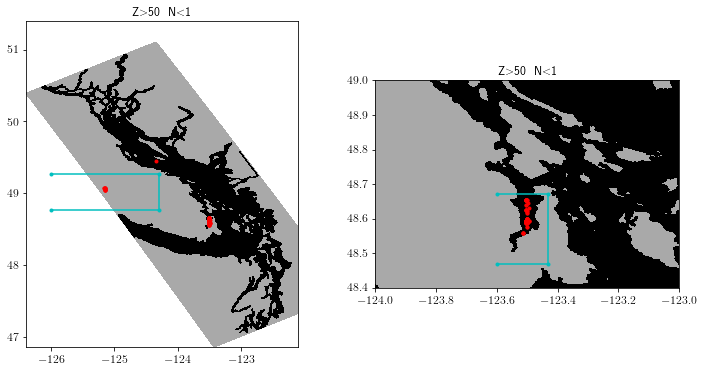

In [35]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
iax=ax[0]
iax.contourf(navlon,navlat,tmask[0,0,:,:],levels=(0,.5,1.5),lw=.5,colors=('darkgray','k','k'))
iax.set_xlim(-126.4,-122.1)
viz_tools.set_aspect(iax,coords='map')
ii=(df['Z']>50)&(df['N']<1)
iax.plot(df.loc[ii,['Lon']],df.loc[ii,['Lat']],'r.')
iax.set_title('Z$>$50 & N$<$1')
iax.plot((-126,-124.3,-124.3,-126),(48.77,48.77,49.27,49.27),'c.-')

iax=ax[1]
iax.contourf(navlon,navlat,tmask[0,0,:,:],levels=(0,.5,1.5),lw=.5,colors=('darkgray','k','k'))
iax.set_xlim(-126.4,-122.1)
viz_tools.set_aspect(iax,coords='map')
ii=(df['Z']>50)&(df['N']<1)
iax.plot(df.loc[ii,['Lon']],df.loc[ii,['Lat']],'r.')
iax.set_title('Z$>$50 & N$<$1')
iax.plot((-123.6,-123.43,-123.43,-123.6),(48.47,48.47,48.67,48.67),'c.-')
iax.set_xlim(-124,-123)
iax.set_ylim(48.4,49)

In [9]:
#d1=et._gridHoriz(df.loc[df.Z>150].copy(deep=True),tmask,navlon,navlat,wrapSearch=False,resetIndex=True);
d1=et._gridHoriz(df.copy(deep=True),tmask,navlon,navlat,wrapSearch=False,resetIndex=True);
d1['k']=np.nan
for ind, row in d1.iterrows():
    ik=et._getZInd_bin(row['Z'],None,boundsFlag=True)
    if (not np.isnan(ik)) and (tmask[0,ik,row['j'],row['i']]==1):
        d1.loc[ind,['k']]=ik

(Lat,Lon)= 47.05 -122.31666666666666  not matched to domain
(Lat,Lon)= 47.1 -122.7  not matched to domain
(Lat,Lon)= 47.1 -122.68333333333334  not matched to domain
(Lat,Lon)= 47.166666666666664 -122.51666666666667  not matched to domain
(Lat,Lon)= 49.29933333333334 -122.983  not matched to domain
(Lat,Lon)= 49.30222166666667 -122.94861166666666  not matched to domain
(Lat,Lon)= 49.3025 -122.939445  not matched to domain
(Lat,Lon)= 49.3025 -122.93277833333333  not matched to domain
(Lat,Lon)= 49.304833333333335 -122.94116666666666  not matched to domain
(Lat,Lon)= 49.306945 -122.941945  not matched to domain
(Lat,Lon)= 49.30722166666666 -122.93527833333333  not matched to domain
(Lat,Lon)= 49.312778333333334 -122.94111166666667  not matched to domain
(Lat,Lon)= 49.312778333333334 -122.9325  not matched to domain
(Lat,Lon)= 50.47666666666667 -126.17833333333333  not matched to domain
(Lat,Lon)= 50.4882 -126.3484  not matched to domain
(Lat,Lon)= 50.49666666666667 -126.31166666666667  no

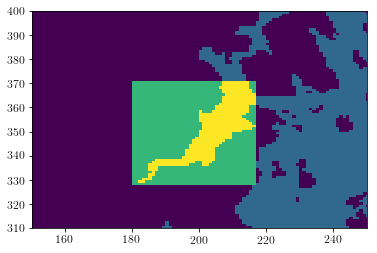

In [10]:
# drop Saanich Inlet
tmask2=np.copy(tmask[0,0,:,:])
tmask2[328:371,180:217]=tmask[0,0,328:371,180:217]+2
plt.pcolormesh(tmask2)
plt.xlim(150,250)
plt.ylim(310,400)
d1.drop(d1.loc[(d1.i>=180)&(d1.i<217)&(d1.j>=328)&(d1.j<371)].index.values,inplace=True)
# also drop east side Vancouver Island points:
d1.drop(d1.loc[(d1.i<10)&(d1.j>=460)&(d1.j<480)].index.values,inplace=True)

In [11]:
np.unique(d1.loc[(d1.N==0)&(d1.Z>20),['Year']])

array([2006.])

(0, 50)

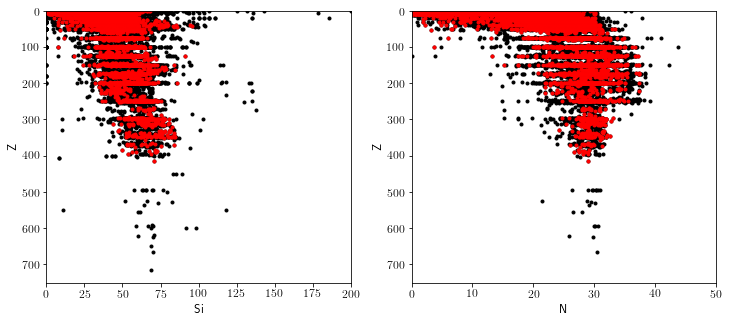

In [16]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(d1['Si'],d1['Z'],'k.')
ax[0].set_xlabel('Si')
ax[0].set_ylabel('Z')
ii=(d1.Year>=2014)
ax[0].plot(d1.loc[ii,['Si']],d1.loc[ii,['Z']],'r.')
ax[0].set_ylim((750,0))
ax[0].set_xlim((0,200))

ax[1].plot(d1['N'],d1['Z'],'k.')
ax[1].set_xlabel('N')
ax[1].set_ylabel('Z')
ii=(d1.Year>=2014)
ax[1].plot(d1.loc[ii,['N']],d1.loc[ii,['Z']],'r.')
ax[1].set_ylim((750,0))
ax[1].set_xlim((0,50))